In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from torch import nn 
import torch 
from torch.utils.data import DataLoader,Dataset

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [2]:

from matplotlib import rc 
from matplotlib.animation import FuncAnimation as animate 
rc('animation',html='html5')

In [3]:
# dataset source: https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5

N = 400
theta = np.sqrt(np.random.rand(N))*2*np.pi # np.linspace(0,2*np.pi,100)

r_a = 2*theta + np.pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - np.pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')


In [4]:
df = pd.read_csv('result.csv')
df.head(3),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       800 non-null    float64
 1   y       800 non-null    float64
 2   label   800 non-null    float64
dtypes: float64(3)
memory usage: 18.9 KB


(         x        y  label
 0 -7.59442  3.45766    0.0
 1  0.74965 -7.71264    1.0
 2  1.80940  5.13957    0.0,
 None)

In [5]:
class Set(Dataset): 
    def __init__(self,dataset,length=1000) -> None:
        dataset.x = (dataset.x - dataset.x.mean())/(dataset.x.max()-dataset.x.min())
        dataset.y = (dataset.y - dataset.y.mean())/(dataset.y.max()-dataset.y.min())
        self.x = dataset[['x','y']][:length].to_numpy() 
        self.y = dataset['label'][:length].to_numpy()
        self.x = torch.from_numpy(self.x).type(torch.FloatTensor)
        self.y = torch.from_numpy(self.y).type(torch.LongTensor)
        
    @property
    def shape(self):
        return f"x: ({self.x.shape}) y: ({self.y.shape})"

    @property
    def plot(self):
        plt.scatter(self.x[:,0],self.x[:,1], c=self.y,cmap=plt.cm.coolwarm)
    
    def __getitem__(self,i):
        return self.x[i],self.y[i] 

    def __len__(self):
        return len(self.x)

In [6]:
class MLP(nn.Module):
    def __init__(self,inFeatures=2,hiddenNodes=1000,numClass=2) -> None:
        super(MLP,self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(inFeatures,hiddenNodes),
            nn.ReLU(),
            nn.Linear(hiddenNodes,hiddenNodes),
            nn.ReLU(),
            nn.Linear(hiddenNodes,numClass)
        )
    def forward(self,x):
        return self.layer(x)


In [7]:
model = MLP()
LossFunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)


In [8]:
data = Set(df)
trainloader = DataLoader(data,batch_size=20)

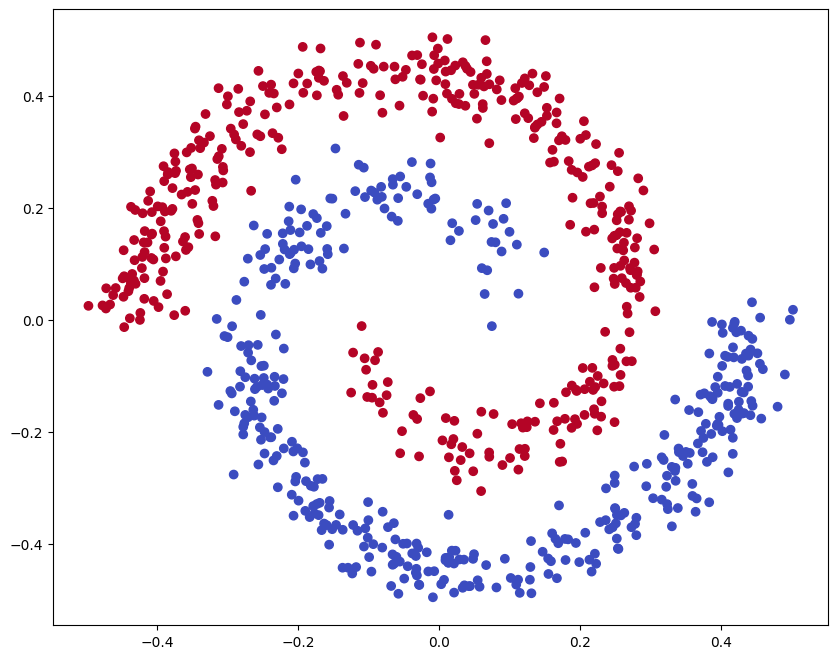

In [9]:
data.plot

tensor([0.4976, 0.4999, 0.5020,  ..., 0.6891, 0.6857, 0.6825],
       grad_fn=<MaxBackward0>)
tensor([0.9096, 0.9142, 0.9187,  ..., 1.1150, 1.1088, 1.1025],
       grad_fn=<MaxBackward0>)
tensor([1.2466, 1.2532, 1.2595,  ..., 1.4795, 1.4713, 1.4630],
       grad_fn=<MaxBackward0>)
tensor([1.5089, 1.5162, 1.5234,  ..., 1.7657, 1.7564, 1.7470],
       grad_fn=<MaxBackward0>)
tensor([1.7086, 1.7161, 1.7234,  ..., 1.9847, 1.9750, 1.9654],
       grad_fn=<MaxBackward0>)
tensor([1.8578, 1.8655, 1.8728,  ..., 2.1490, 2.1392, 2.1294],
       grad_fn=<MaxBackward0>)
tensor([1.9704, 1.9778, 1.9851,  ..., 2.2718, 2.2619, 2.2522],
       grad_fn=<MaxBackward0>)
tensor([2.0544, 2.0619, 2.0692,  ..., 2.3636, 2.3538, 2.3440],
       grad_fn=<MaxBackward0>)
tensor([2.1182, 2.1257, 2.1330,  ..., 2.4328, 2.4232, 2.4133],
       grad_fn=<MaxBackward0>)
tensor([2.1668, 2.1743, 2.1816,  ..., 2.4855, 2.4757, 2.4660],
       grad_fn=<MaxBackward0>)
tensor([2.2043, 2.2118, 2.2191,  ..., 2.5267, 2.5169, 2.5071

tensor([32.2013, 32.6326, 33.0539,  ..., 42.7123, 42.3776, 42.0294],
       grad_fn=<MaxBackward0>)


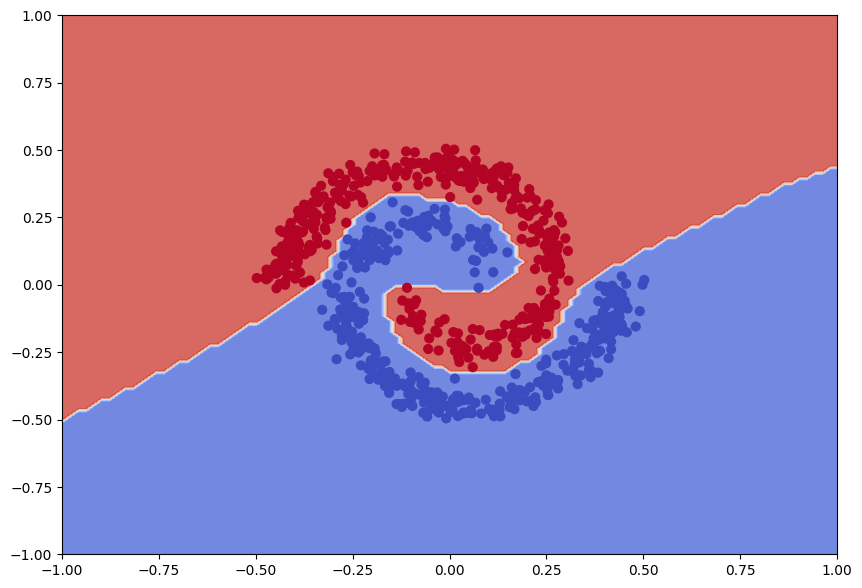

In [10]:
h = 0.02
x_min, x_max = data.x[:, 0].numpy().min() - 1, data.x[:, 0].numpy().max() + 1
y_min, y_max = data.x[:, 1].numpy().min() - 1, data.x[:, 1].numpy().max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
inp = torch.Tensor(np.c_[xx.ravel(),yy.ravel()])


fig , ax = plt.subplots(figsize = (10,7))


def train(_): 
    print(_)
    loss_ = 0
    for x,y in trainloader:
        optimizer.zero_grad()
        # print(x.shape)
        yhat = model(x)
        loss = LossFunc(yhat,y)
        loss.backward()
        optimizer.step()
        loss_+=loss.item()

    __,yhatt = torch.max(model(inp),1)    
    yhatt = yhatt.numpy().reshape(xx.shape)
    ax.clear()
    ax.contourf(xx, yy, yhatt, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(data.x[:, 0], data.x[:, 1], c=data.y, s=40, cmap=plt.cm.coolwarm)
    plt.xlim([-1,1])
    plt.ylim([-1,1])

plots = animate(fig,train,frames=2000,interval = 60,repeat=False)
plots